# **CIFAR100 - Non-Insect Invertebrates Classification**

## Importing the Necessary Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Importing the Dataset
# Coarse Class:   Non-insect invertebrates
# Fine Class:     crab, lobster, snail, spider, worm
# importing both the coarse and fine class

# Coarse Class
(X_C_train, y_C_train), (X_C_test, y_C_test) = tf.keras.datasets.cifar100.load_data(label_mode='coarse')
# Fine Class
(X_F_train, y_F_train), (X_F_test, y_F_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 2s 0us/step


In [47]:
# Extracting index of fine labels

coarse_class_labels = ['aquatic mammals', 'fish', 'flowers', 'food containers',
                       'fruit and vegetables', 'household electrical devices',
                       'household furniture', 'insects', 'large carnivores',
                       'large man-made outdoor things', 'large natural outdoor scenes',
                       'large omnivores and herbivores', 'medium-sized mammals',
                       'non-insect invertebrates', 'people', 'reptiles',
                       'small mammals', 'trees', 'vehicles 1', 'vehicles 2']

fine_class_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
    'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train',
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]

labels_of_non_insect_invertebrates = []
label_mapping = {}

# Selecting non-insect invertebrates
non_insect_invertebrates = ['crab', 'lobster', 'snail', 'spider', 'worm']
print("Fine labels of Non-Insect Invertebrates:")
for i, name in enumerate(fine_labels):
    if name in non_insect_invertebrates:
        label_mapping[i] = non_insect_invertebrates.index(name)
        labels_of_non_insect_invertebrates.append(i)

# Extracting the non-insect invertebrates from the fine class
fine_train_index = np.isin(y_F_train, labels_of_non_insect_invertebrates).reshape(X_F_train.shape[0])
y_train = y_F_train[fine_train_index]

fine_test_index = np.isin(y_F_test, labels_of_non_insect_invertebrates).reshape(X_F_test.shape[0])
y_test = y_F_test[fine_test_index]

# Setting to 0-4
y_train = np.vectorize(label_mapping.get)(y_train)
y_test = np.vectorize(label_mapping.get)(y_test)

# Normalizing the data
X_train = X_F_train[fine_train_index] / 255
X_test = X_F_test[fine_test_index] / 255



Fine labels of Non-Insect Invertebrates:


<ipython-input-48-41a4f7551a3b>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(non_insect_invertebrates[int(y_train[i])])  # Convert y_train[i] to int


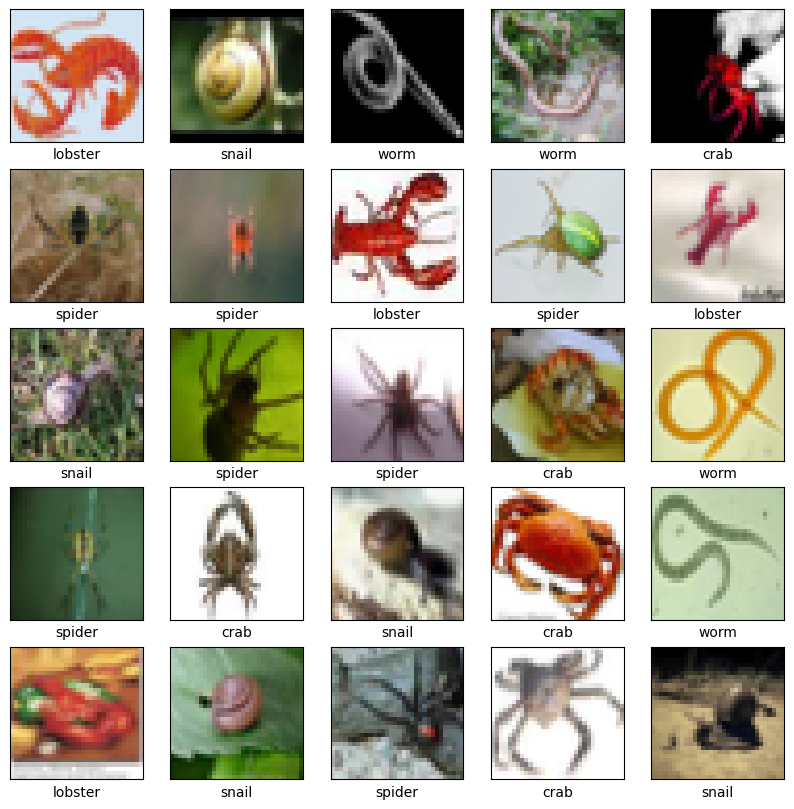

In [48]:
def display_images(X_train, y_train, non_insect_invertebrates):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i], cmap=plt.cm.binary)
        plt.xlabel(non_insect_invertebrates[int(y_train[i])])  # Convert y_train[i] to int
    plt.show()

display_images(X_train, y_train, non_insect_invertebrates)

In [49]:
# Training the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.summary()

# Evaluating the model
model_eval = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

 6/16 [==========>...................] - ETA: 0s

<ipython-input-50-89f6c8f5f81d>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(non_insect_invertebrates[int(y_test[i])], color='black')  # Convert y_test[i] to int


16/16 [==============================] - 0s 14ms/step


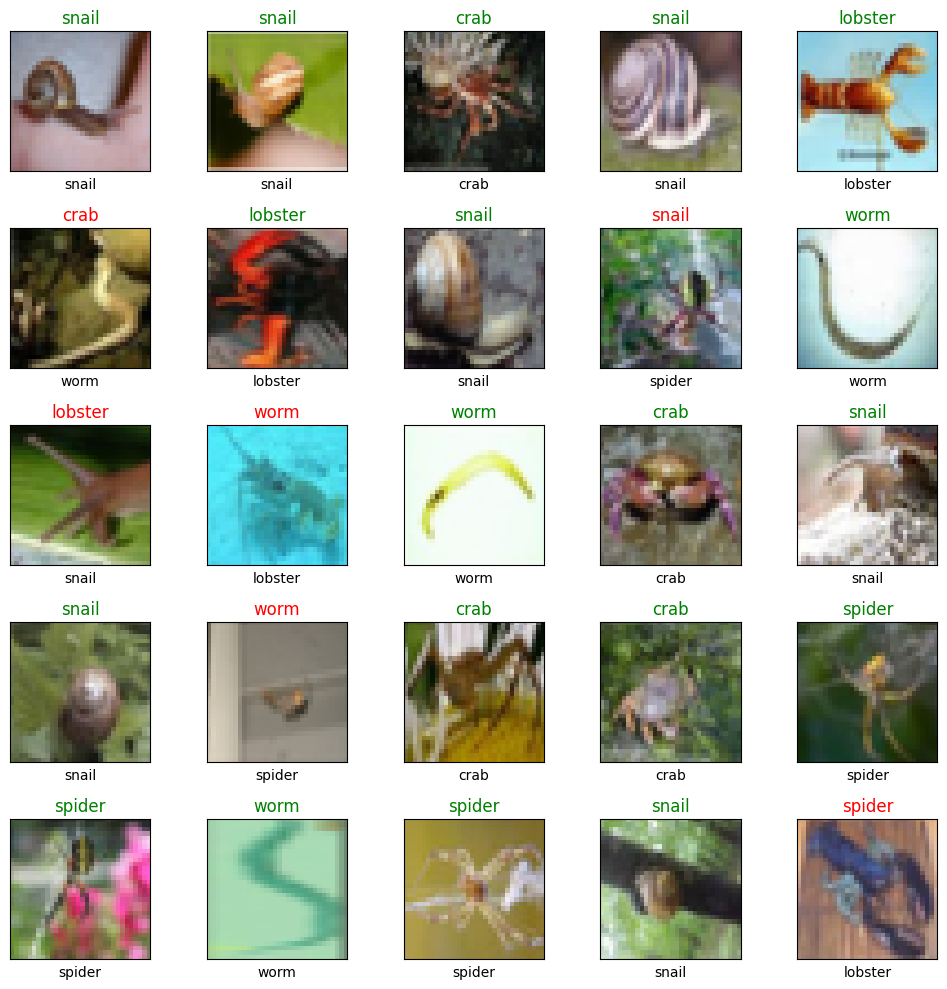

In [50]:
def display_images_with_label(X_test, y_test, non_insect_invertebrates, model):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[i], cmap=plt.cm.binary)
        prediction = model.predict(X_test)
        plt.xlabel(non_insect_invertebrates[int(y_test[i])], color='black')  # Convert y_test[i] to int
        title_color = 'green' if np.argmax(prediction[i]) == y_test[i] else 'red'
        plt.title(non_insect_invertebrates[np.argmax(prediction[i])], color=title_color)
    plt.tight_layout()  # Add this line to fix overlapping text
    plt.show()

display_images_with_label(X_test, y_test, non_insect_invertebrates, model)


In [51]:
# Printing metrics classification report
from sklearn.metrics import classification_report
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, y_pred, target_names=non_insect_invertebrates))


16/16 [==============================] - 0s 13ms/step
              precision    recall  f1-score   support

        crab       0.59      0.57      0.58       100
     lobster       0.55      0.68      0.61       100
       snail       0.65      0.66      0.66       100
      spider       0.72      0.72      0.72       100
        worm       0.78      0.62      0.69       100

    accuracy                           0.65       500
   macro avg       0.66      0.65      0.65       500
weighted avg       0.66      0.65      0.65       500

